# Oversampling the Minority Class
**OPIM 5512: Data Science Using Python - University of Connecticut**

-----------------------------------------------

Let's review some standard methods for dealing with imbalanced datasets. Our goal is to get a balanced sample and there are MANY ways you can choose to go about this.

* **Random Oversampling:** Randomly duplicate examples in the minority class (until you have matching number of majority and minority class rows).

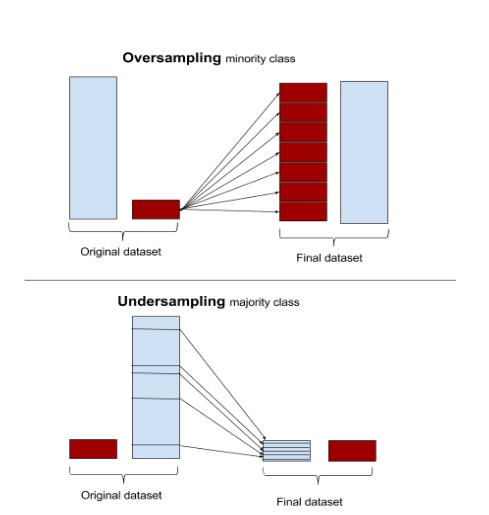

Link for the [original image](https://stats.stackexchange.com/questions/351638/random-sampling-methods-for-handling-class-imbalance).

## Motivation
Imbalanced data (for classification problems) occurs when there is a presence of a minority class. Models built from imbalanced data can result in biased predictions or misleading accuracy.



In [ ]:
# this is to get rid of some annoying future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

# An Imbalanced Dataset
Maybe use GDOWN later? The original dataset came from an Analytics Vidhya challenge.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Loan-Prediction-Dataset/master/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Let's just quickly drop that annoying ID column.

In [ ]:
df.drop('Loan_ID', axis=1, inplace=True)
df.shape

(614, 12)

And let's see if there are any missing values - there are, so we drop them for simplicity right now.

In [ ]:
#check for missing values
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.dropna(inplace=True, axis=0)
print(df.shape) # eek, we lost quite a few rows!

(480, 12)


Now let's check for the class distribution of the target variable.

In [ ]:
df['Loan_Status'].value_counts() # imbalanced! uses pandas

Y    332
N    148
Name: Loan_Status, dtype: int64

In [ ]:
Counter(df['Loan_Status']) # same result! uses Counter

Counter({'N': 148, 'Y': 332})

The reason why this is an imbalanced dataset is because there are more of one category vs. another - it's important noting that there is no emotional context of majority and minority class - the minority class is the class that has less rows!

# Balanced Sampling (by hand - random oversampling of minority class)

Before learning about the excellent `imblearn` library, you are going to learn how to break this out by hand.

There are 148 samples in the minority class (N) and 332 in the majority class. In this method, you will randomly grab rows from the minority class until you have an equal matching number of observations from each class - 332 Y and 332 N.

In this method, you will not throw away any information from the majority class - as you previously did in undersampling.

In [ ]:
# grab all of the Ys
Y_df = df[df['Loan_Status']=='Y']
print(Y_df.shape)

# note how we start with the majority class first

(332, 12)


In [ ]:
# grab all of the Ns
N_df = df[df['Loan_Status']=='N']
print(N_df.shape)

(148, 12)


In [ ]:
# grab a RANDOM matching number of rows, WITH replacement (True)
# we will name this a different name
N_subset_df = N_df.sample(n=Y_df.shape[0], replace=True) # set a seed if you want reproducible results
print(N_subset_df.shape)

# notice how all the variable names are different here vs. the other notebook
# this line would break if you had replace=False

(332, 12)


Great! That all lines up. Now you could just push the two datasets together (and maybe shuffle for good luck...) and then you could split into X and Y.

In [ ]:
balanced_df = Y_df.append(N_subset_df)
print(balanced_df.shape) # voila!

(664, 12)


In [ ]:
332*2 # check your work

664

* **Pro:** you have a balanced dataset, easy to implement.
* **Con:** if you only have a few rows, then perhaps you are not going to learn enough for the rows that are available - you may be ignoring important information.

# Split data into X and Y
The above example was to get your feet wet - now let's split the original data into X and Y and utilize the `imblearn` package.

In [ ]:
y = df['Loan_Status']
X = df.drop('Loan_Status', axis=1)
print(X.shape, y.shape)

(480, 11) (480,)


# Random Oversampling (the minority class)
**Random Oversampling:** Randomly duplicate examples in the minority class.


In [ ]:
# example of random oversampling to balance the class distribution
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({'N': 332, 'Y': 332})


# When to use oversampling (undersampling)?
* Read in df
* Clean the df
* Take 10 or 15% of the clean data and put it on the side (no over or undersampling here!) Let's call it the 'holdout sample'.
* With remaining 85% of data, perform oversampling.
* Split your data into train and test partitions.
* Build a model on train, apply to test and evaluate predictions.
* Apply your model to the holdout sample which has the same class distribution as the original dataset. Calculate error metrics and make sure you are consistent with the oversampled results!
* Repeat this 10, 20 or 30x to make sure the distribution of results is stable.

# Conclusion
You got the same result! In a few lines of code, which can be much cleaner and less prone to error. But it's good to know that you could do this by hand if you had to explain it to someone of weren't able to install packages due to security reasons (happens all the time in industry.)

# Resources
* http://glemaitre.github.io/imbalanced-learn/generated/imblearn.over_sampling.RandomOverSampler.html#imblearn.over_sampling.RandomOverSampler